# Modelling

In [1]:
import os
import joblib
import pandas as pd

In [2]:
train_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(train_data_file, index_col=0, low_memory=False)
extra_train_data_file = os.path.join('..', '..', '..', '..', 'data', 'interim', 'all_test_2h.csv')
extra_train_data = pd.read_csv(extra_train_data_file, low_memory=False)

all_train_data = pd.concat([train_data, extra_train_data], axis=0)
all_train_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


## Create patient-specific models

-----------p01-----------
Best hyperparameters found.
RMSE: 0.14461787451369984


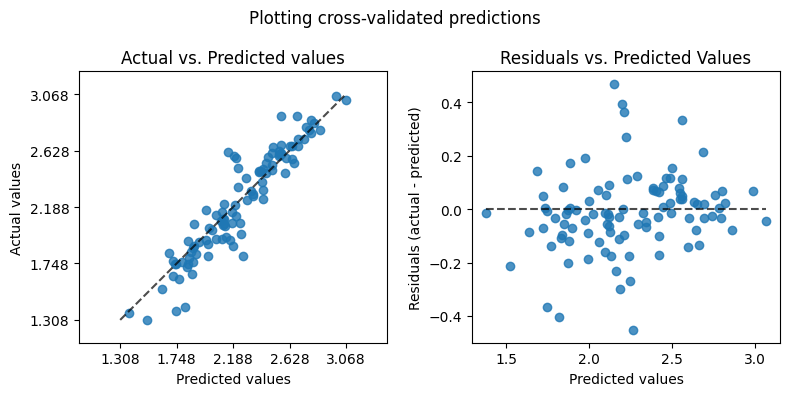

-----------p02-----------
Best hyperparameters found.
RMSE: 0.1315483621449156


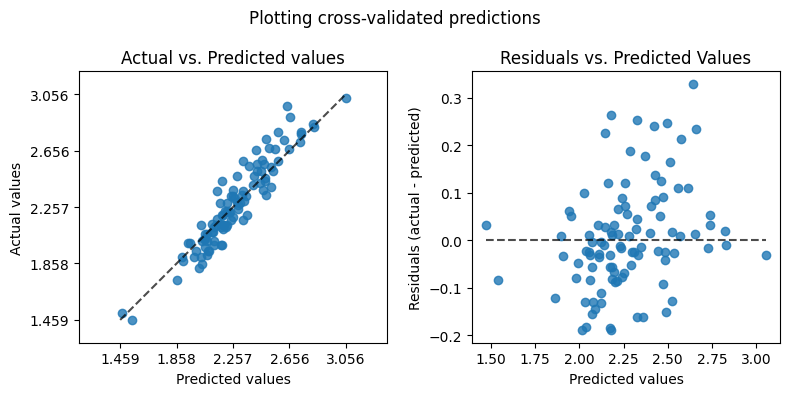

-----------p03-----------
Best hyperparameters found.
RMSE: 0.12358325360430908


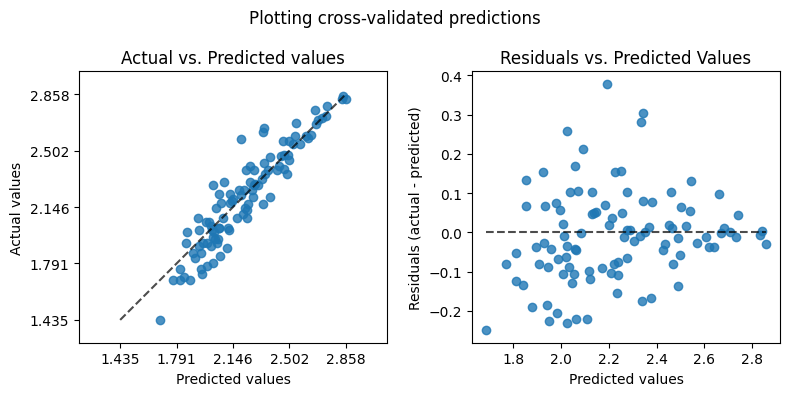

-----------p04-----------
Best hyperparameters found.
RMSE: 0.14639923607557825


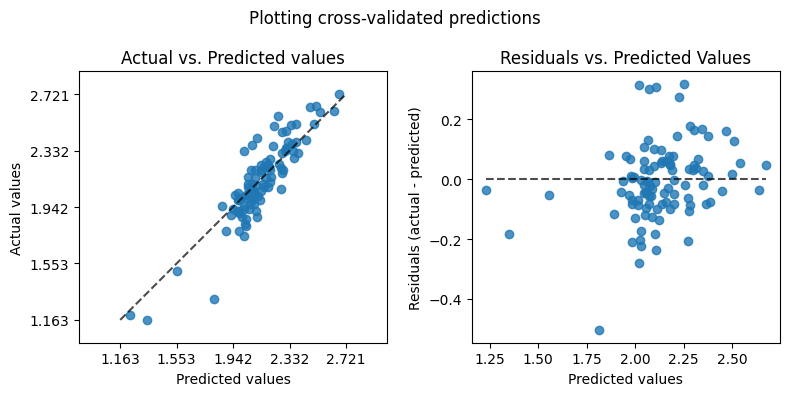

-----------p05-----------
Best hyperparameters found.
RMSE: 0.11702246515527881


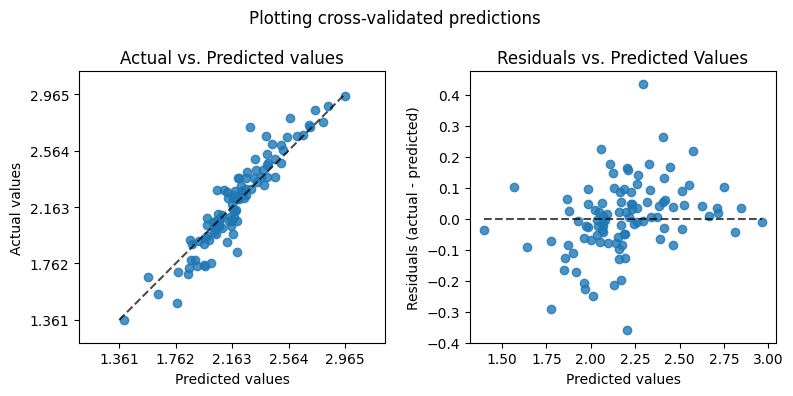

-----------p06-----------
Best hyperparameters found.
RMSE: 0.12011329435796084


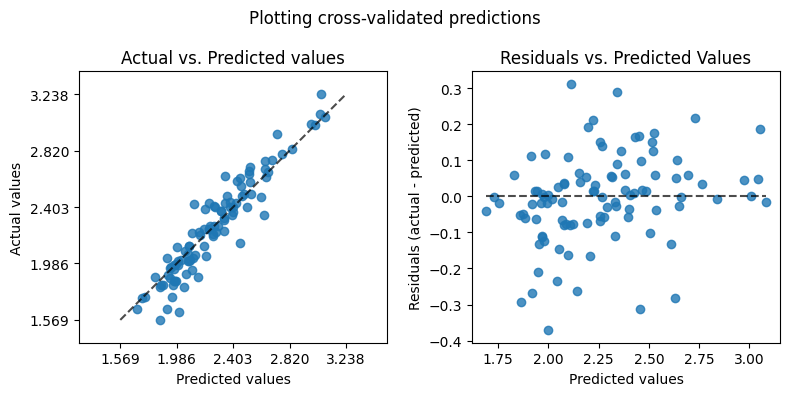

-----------p10-----------
Best hyperparameters found.
RMSE: 0.11513432730691482


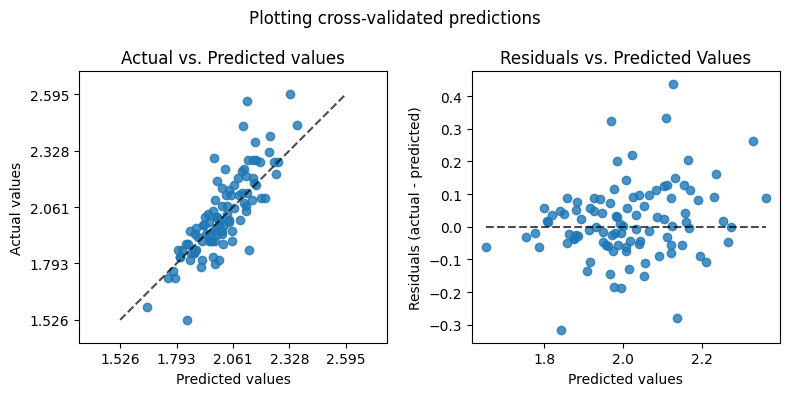

-----------p11-----------
Best hyperparameters found.
RMSE: 0.1298078290757342


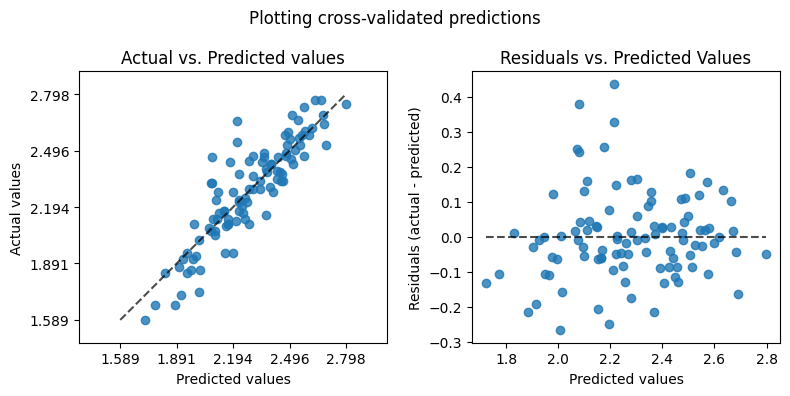

-----------p12-----------
Best hyperparameters found.
RMSE: 0.11227672593010263


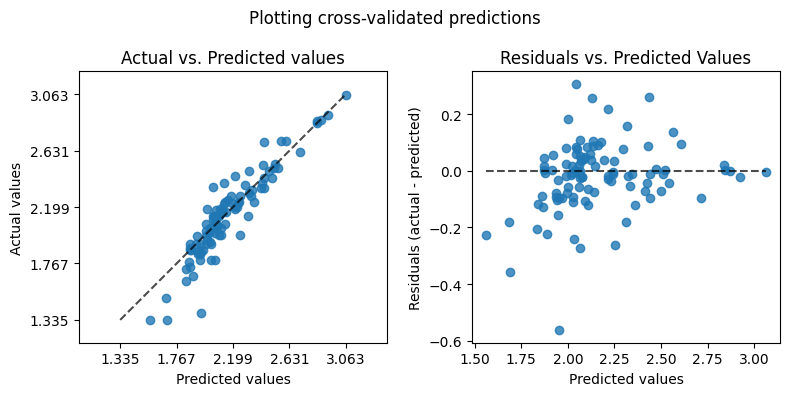

-----------p15-----------
Best hyperparameters found.
RMSE: 0.10317320278683993


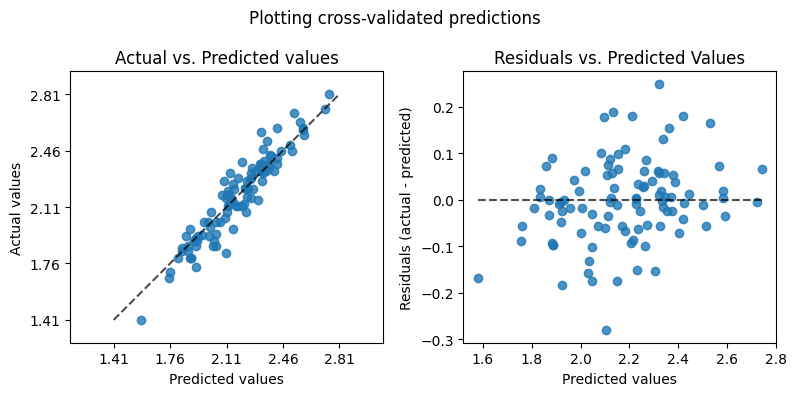

-----------p16-----------
Best hyperparameters found.
RMSE: 0.0549718580675371


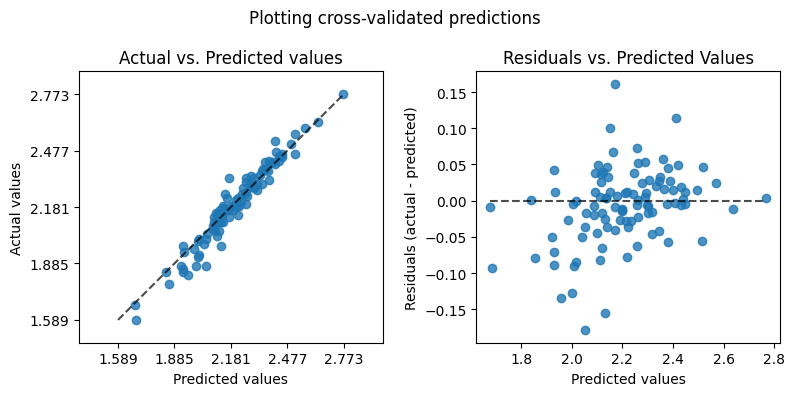

-----------p18-----------
Best hyperparameters found.
RMSE: 0.08216008130600863


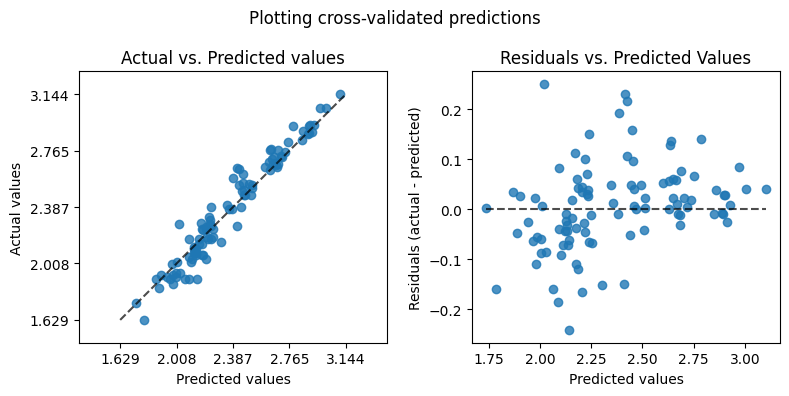

-----------p19-----------
Best hyperparameters found.
RMSE: 0.06016638925650078


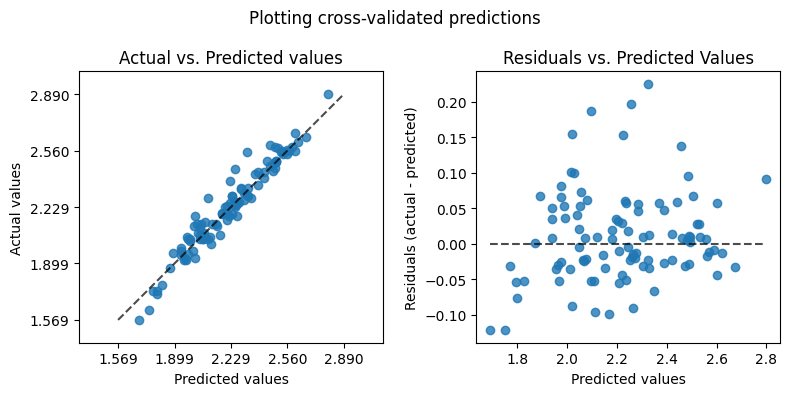

-----------p21-----------
Best hyperparameters found.
RMSE: 0.08676605839197686


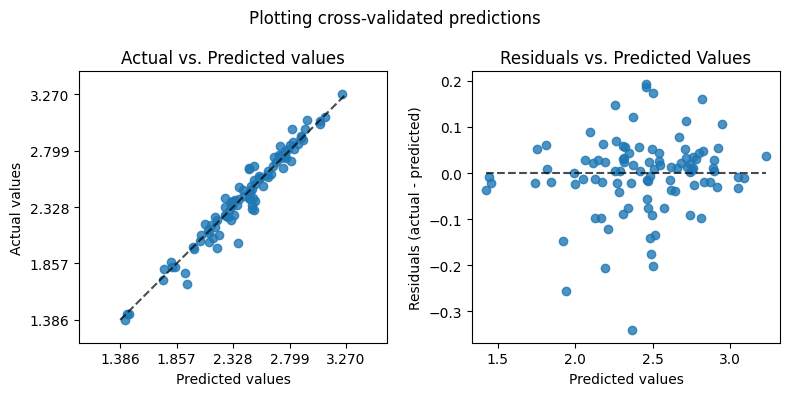

-----------p22-----------
Best hyperparameters found.
RMSE: 0.07549819989089411


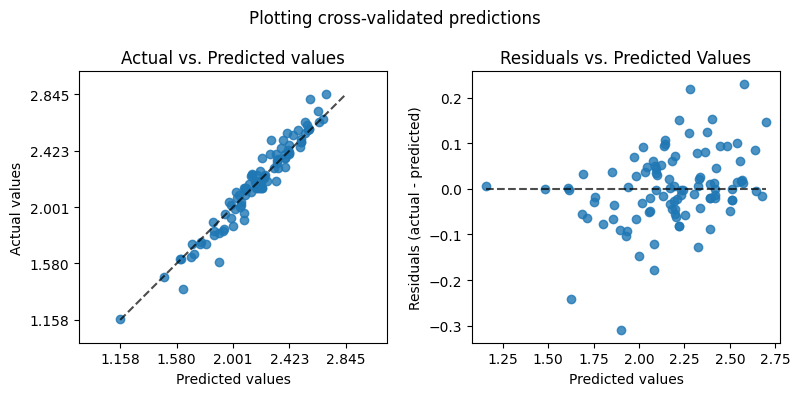

-----------p24-----------
Best hyperparameters found.
RMSE: 0.07278806079383762


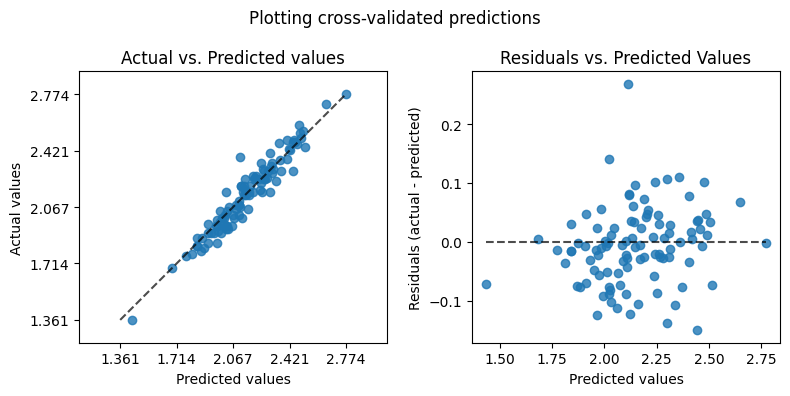

In [3]:
import numpy as np
import joblib
from pipelines import pipeline
from src.features.tuners import XGBHyperparameterTuner

patient_ids = all_train_data['p_num'].unique()
for patient_id in patient_ids:
    print(f'-----------{patient_id}-----------')

    data = all_train_data[all_train_data['p_num'] == patient_id]
    data = data.drop(columns=['p_num'])

    train_data_patient = pipeline.fit_transform(data)
    X = train_data_patient.drop(columns=['bg+1:00'])
    y = np.log1p(train_data_patient['bg+1:00'])

    tuner = XGBHyperparameterTuner(search_space=None)
    tuner.fit(X=X, y=y)

    print('Best hyperparameters found.')
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()

    joblib.dump(tuner.get_best_model(), f'{tuner.__name__}.{patient_id}.model.pkl')